<a href="https://colab.research.google.com/github/EstherOgutu/Hass-Consulting-Company/blob/main/Hass_Consulting_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HASS CONSULTING COMPANY ANALYSIS

##1. Defining the Question

###a) Specifying the Data Analytic Question


This is an analysis to study the factors that affect housing prices using information provided on real estate properties that was collected over a few months.A model with then be created, which will allow the company(Hass Consulting Company) to accurately predict the sale of prices upon being provided with the predictor variables. 

###b) Defining the Metric of Success


The metric of success for this project is evaluate the factors affecting housing prices. Another metric of success building a model that can predic the sale price of house. The accuracy level of the prediction model should be atleast 85% to be termed as a good model.

###c) Understanding the Context


Hass Consulting Company is a real estate firm that offers investment-grade developments all over Nairobi City. The developments offered have been conceptualized by their development team to be high quality assets using a data-driven approach in planning and design, that gears property for high rental returns and an escalated rate of capital growth.

###d) Recording the Experimental Data


For this project, I will perform the following actions:

1.Reading the data.

2.Checking the data.

3.Tidyingthe datasets Analysis. For the cleaning part, I will check for outliers, anomalies, missing values,checking for duplicates,dropping unnecessary columns and changing the column names into lowercase for uniformity and stripping off whitespaces and dashes.

4.I will the perform EDA (Univariate,Bivariate, and Multivariate).

5 Performing regression analysis.

  -Incorporate categorical independent variables into your models.

  -Check for multicollinearity.

  -Perform regression analysis using the following techniques and access their performance, giving a recommendation of the best:

 1.Multiple Linear Regression

 2.Quantile Regression

 3.Ridge Regression

 4.Lasso Regression

 5.Elastic Net Regression

6.Provide a recommendation based on your analysis. 

 -Create residual plots for your models, and assess heteroskedasticity using Barlett's test.

7.Challenge your solution by providing insights on how you can make improvements in model improvement.



###e) Data Relevance

The data has been provided by the company (Hass Consulting). The data has attributes that are crucial for the company, since it will help the company have a knowledge on the factors that affect pricing in the real estate world. 

##2. Reading Data

In [ ]:
# Importing the Libraries that we will use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression


In [ ]:
# Let's expand the no of visible columns of dataframe
pd.set_option("display.max.columns", None)

In [ ]:
# Reading the data from the dataset
housing=pd.read_csv('hass_consulting_data.csv')

##3. Checking the data

In [ ]:
# Previewing the first five record in the dataset
housing.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

In [ ]:
# Previewing the first five record in the dataset
housing.tail()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
21608   263000018  360000.0         3       2.50         1530      1131   
21609  6600060120  400000.0         4       2.50         2310      5813   
21610  1523300141  402101.0         2       0.75         1020      1350   
21611   291310100  400000.0         3       2.50         1600      2388   
21612  1523300157  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
21608     3.0           0     0          3      8        1530              0   
21609     2.0           0     0          3      8        2310              0   
21610     2.0           0     0          3      7        1020              0   
21611     2.0           0     0          3      8        1600              0   
21612     2.0           0     0          3      7        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
21608      2009             0    98103  47.6993 -122.346           1530   
21609      2014             0    98146  47.5107 -122.362           1830   
21610      2009             0    98144  47.5944 -122.299           1020   
21611      2004             0    98027  47.5345 -122.069           1410   
21612      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15  
21608        1509  
21609        7200  
21610        2007  
21611        1287  
21612        1357

In [ ]:
# Checking the shape of the datasets (rows and columns)
housing.shape

(21613, 20)

Our housing dataset has 21613 rows and 20 columns

In [ ]:
# Understanding our housing dataset 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [ ]:
# Checking all the columns have the appropriate datatype
housing.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
# Checking the statistical information of the numerical values in our datasets
housing.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.401822e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.673622e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

##4. External Data Source Validation

The data has been obtained from Hass Consulting Company, which is the company for which I am conducting the analysis for. The data is, therefore valid and credible.

##5. Tidying the Datasets

In [ ]:
# Checking for Outliers using IQR method
# Defining a function to check for outliers

def outliers(data):
  # Calculating the first quantile
  Q1=data.quantile(0.25) 
  # Calculating the third quantile
  Q3 = data.quantile(0.75)
  # Calculating the Quartile Range
  IQR = Q3 - Q1 
  print((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
  print('-------------------------------------------------------------------------------')
  #Displaying the number of outliers in the fields where the exist
  print(IQR)
outliers(housing)

          id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      False  False     False      False        False     False   False   
1      False  False     False      False        False     False   False   
2      False  False     False      False        False     False   False   
3      False  False     False      False        False     False   False   
4      False  False     False      False        False     False   False   
...      ...    ...       ...        ...          ...       ...     ...   
21608  False  False     False      False        False     False   False   
21609  False  False     False      False        False     False   False   
21610  False  False     False      False        False     False   False   
21611  False  False     False      False        False     False   False   
21612  False  False     False      False        False     False   False   

       waterfront   view  condition  grade  sqft_above  sqft_basement  \
0           False  False  

In [ ]:
# Dealing with outliers
# We are using the trim method to deal with the outliers

# Creating a copy of our dataframe so that we keep one copy
new_housing=housing.copy()
# Iterating over the columns in our new dataframe to get the values that are not within the upper and lower limit
for index, c in new_housing.iteritems():
  # Defining the upper limit
  upper_limit=c.mean() + 3*c.std()
  # Defining the lower limit
  lower_limit=c.mean() - 3*c.std()
  # Applying the trim to our dataframe
  new_housing = new_housing[(c <= upper_limit) & (c >= lower_limit)]
# Checking the old shape and the new shape after the trim
print('Old Shape' +str(housing.shape))
print('New Shape' +str(new_housing.shape))
data_lost = housing.shape[0] - new_housing.shape[0]
percent = (data_lost / housing.shape[0]) * 100
print("Number of data samples lost:", data_lost)
print("Percent of data samples lost:", round(percent, 2))

Old Shape(21613, 20)
New Shape(18702, 20)
Number of data samples lost: 2911
Percent of data samples lost: 13.47


We have lost 13.47% of our data. This is not so much data lost.

In [ ]:
# Printing the statistical information of our old and new dataset(after the trim)
print(tabulate(housing.describe(), headers='keys', tablefmt='psql'))
print(tabulate(new_housing.describe(), headers='keys', tablefmt='psql'))

+-------+-----------------+--------------+--------------+--------------+---------------+-----------------+--------------+----------------+--------------+--------------+-------------+--------------+-----------------+------------+----------------+-----------+--------------+--------------+-----------------+--------------+
|       |              id |        price |     bedrooms |    bathrooms |   sqft_living |        sqft_lot |       floors |     waterfront |         view |    condition |       grade |   sqft_above |   sqft_basement |   yr_built |   yr_renovated |   zipcode |          lat |         long |   sqft_living15 |   sqft_lot15 |
|-------+-----------------+--------------+--------------+--------------+---------------+-----------------+--------------+----------------+--------------+--------------+-------------+--------------+-----------------+------------+----------------+-----------+--------------+--------------+-----------------+--------------|
| count | 21613           |  21613   

From the statistical data, we see a big difference between the old and new dataframes. For instance, in the bedrooms column, in the old dataset, the max is 33, yet the mean is 3. After the trim, the max is 6, which makes so much sense. This shows that our new dataset is fit to give us credible analysis.

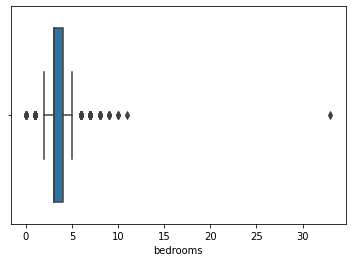

In [ ]:
# Boxplot for the bedrooms column before the trim
sns.boxplot(housing['bedrooms'])

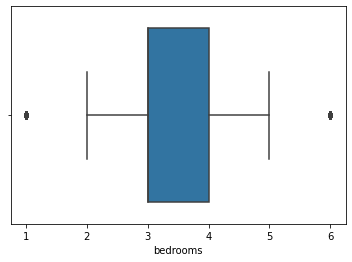

In [ ]:
# Boxplot for the bedrooms column after the trim
sns.boxplot(new_housing['bedrooms'])

In [ ]:
# Dropping unncessary columns which are not relevant in our analysis
new_housing=new_housing.drop(['id', 'yr_renovated','waterfront'], axis =1)
new_housing.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
0  221900.0         3       1.00         1180      5650     1.0     0   
2  180000.0         2       1.00          770     10000     1.0     0   
3  604000.0         4       3.00         1960      5000     1.0     0   
4  510000.0         3       2.00         1680      8080     1.0     0   
6  257500.0         3       2.25         1715      6819     2.0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  zipcode      lat  \
0          3      7        1180              0      1955    98178  47.5112   
2          3      6         770              0      1933    98028  47.7379   
3          5      7        1050            910      1965    98136  47.5208   
4          3      8        1680              0      1987    98074  47.6168   
6          3      7        1715              0      1995    98003  47.3097   

      long  sqft_living15  sqft_lot15  
0 -122.257           1340        5650  
2 -122.233           2720        8062  
3 -122.393           1360        5000  
4 -122.045           1800        7503  
6 -122.327           2238        6819

In [ ]:
# Checking for Anomalies

# Defining a function to check for any duplicates in the datasets
def duplicates(data):
  print(data.duplicated().sum())
duplicates(new_housing)

4


In [ ]:
# Displaying the duplicated rows in the dataset
duplicate = new_housing[new_housing.duplicated()]
duplicate

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
4352   259950.0         2       2.00         1070       649     2.0     0   
14983  585000.0         3       2.50         2290      5089     2.0     0   
20054  555000.0         3       2.50         1940      3211     2.0     0   
20524  529500.0         3       2.25         1410       905     3.0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  zipcode  \
4352           3      9         720            350      2008    98106   
14983          3      9        2290              0      2001    98006   
20054          3      8        1940              0      2009    98027   
20524          3      9        1410              0      2014    98116   

           lat     long  sqft_living15  sqft_lot15  
4352   47.5213 -122.357           1070         928  
14983  47.5443 -122.172           2290        7984  
20054  47.5644 -122.093           1880        3078  
20524  47.5818 -122.402           1510        1352

We have 4 duplicate values in the dataset. On cross-checking, we realize that the duplication is justified because they are different entries, but have the same value of condition. 
In this case, the duplicates will not be dropped.

In [ ]:
# Find the total Missing Data in each column
def missingdata(data):
  print(data.isnull().sum())
missingdata(new_housing)

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


There are no missing values in our dataset.

In [ ]:
#To ensure uniformity,we will change the column names to lower case, stripping of the whitespaces,removing periods, 
#this ensures good readerbility plus every possible naming issue is covered.
new_housing.columns = new_housing.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('.', '')
print(new_housing.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18702 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          18702 non-null  float64
 1   bedrooms       18702 non-null  int64  
 2   bathrooms      18702 non-null  float64
 3   sqft_living    18702 non-null  int64  
 4   sqft_lot       18702 non-null  int64  
 5   floors         18702 non-null  float64
 6   view           18702 non-null  int64  
 7   condition      18702 non-null  int64  
 8   grade          18702 non-null  int64  
 9   sqft_above     18702 non-null  int64  
 10  sqft_basement  18702 non-null  int64  
 11  yr_built       18702 non-null  int64  
 12  zipcode        18702 non-null  int64  
 13  lat            18702 non-null  float64
 14  long           18702 non-null  float64
 15  sqft_living15  18702 non-null  int64  
 16  sqft_lot15     18702 non-null  int64  
dtypes: float64(5), int64(12)
memory usage: 2.6 MB
None

In [ ]:
# Exporting our cleaned fifa dataset
#
new_housing.to_csv("housing_df.csv", index=False)

In [ ]:
# Lets read our dataset from our CSV file and create a dataframe that we will use
#
housing_df=pd.read_csv('housing_df.csv')

# Previewing the first five records using our tabulatetable function created earlier
housing_df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
0  221900.0         3       1.00         1180      5650     1.0     0   
1  180000.0         2       1.00          770     10000     1.0     0   
2  604000.0         4       3.00         1960      5000     1.0     0   
3  510000.0         3       2.00         1680      8080     1.0     0   
4  257500.0         3       2.25         1715      6819     2.0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  zipcode      lat  \
0          3      7        1180              0      1955    98178  47.5112   
1          3      6         770              0      1933    98028  47.7379   
2          5      7        1050            910      1965    98136  47.5208   
3          3      8        1680              0      1987    98074  47.6168   
4          3      7        1715              0      1995    98003  47.3097   

      long  sqft_living15  sqft_lot15  
0 -122.257           1340        5650  
1 -122.233           2720        8062  
2 -122.393           1360        5000  
3 -122.045           1800        7503  
4 -122.327           2238        6819

In [ ]:
# Let's check for Nan values in the dataset
housing_df.isnull().sum().sum()

0

Our dataset frames has no missing values

##6. Exploratory Data Analysis

###1. Univariate Analysis

In [ ]:
# Getting a description of the statistics of numerical values
housing_df.describe()

price      bedrooms     bathrooms   sqft_living       sqft_lot  \
count  1.870200e+04  18702.000000  18702.000000  18702.000000   18702.000000   
mean   4.809589e+05      3.323067      2.038191   1949.076783    9798.381938   
std    2.314239e+05      0.848128      0.687622    737.953004   11368.968959   
min    8.200000e+04      1.000000      0.000000    370.000000     520.000000   
25%    3.120000e+05      3.000000      1.500000   1390.000000    5000.000000   
50%    4.310000e+05      3.000000      2.000000   1840.000000    7350.000000   
75%    5.990000e+05      4.000000      2.500000   2409.000000    9881.500000   
max    1.640000e+06      6.000000      4.250000   4750.000000  137214.000000   

             floors          view     condition         grade    sqft_above  \
count  18702.000000  18702.000000  18702.000000  18702.000000  18702.000000   
mean       1.481580      0.091274      3.422575      7.536306   1694.014972   
std        0.540257      0.400069      0.647866      1.025133    707.864311   
min        1.000000      0.000000      2.000000      5.000000    370.000000   
25%        1.000000      0.000000      3.000000      7.000000   1170.000000   
50%        1.000000      0.000000      3.000000      7.000000   1500.000000   
75%        2.000000      0.000000      4.000000      8.000000   2094.500000   
max        3.000000      2.000000      5.000000     11.000000   4270.000000   

       sqft_basement      yr_built       zipcode           lat          long  \
count   18702.000000  18702.000000  18702.000000  18702.000000  18702.000000   
mean      255.061812   1971.822532  98078.401187     47.560446   -122.220735   
std       387.263351     28.971179     53.308470      0.140202      0.128616   
min         0.000000   1900.000000  98001.000000     47.176400   -122.502000   
25%         0.000000   1953.000000  98033.000000     47.467650   -122.329000   
50%         0.000000   1976.000000  98065.000000     47.571800   -122.235000   
75%       500.000000   1997.000000  98118.000000     47.681100   -122.134000   
max      1610.000000   2015.000000  98199.000000     47.777600   -121.797000   

       sqft_living15    sqft_lot15  
count   18702.000000  18702.000000  
mean     1910.260988   9049.652551  
std       598.702946   8930.448540  
min       460.000000    651.000000  
25%      1470.000000   5000.000000  
50%      1791.000000   7439.000000  
75%      2260.000000   9600.000000  
max      4040.000000  93825.000000

In [ ]:
# Displaying the total value of the different grades
housing_df.grade.value_counts()

7     8275
8     5412
9     2097
6     1861
10     731
5      202
11     124
Name: grade, dtype: int64

In [ ]:
# Displaying the total value of the different conditions
housing_df.condition.value_counts()

3    12013
4     5046
5     1500
2      143
Name: condition, dtype: int64

In [ ]:
# Displaying the total value of the different bedrooms
housing_df.bedrooms.value_counts()

3    8801
4    5862
2    2493
5    1225
6     173
1     148
Name: bedrooms, dtype: int64

In [ ]:
# Displaying the total value of the different bathrooms
housing_df.bathrooms.value_counts()

2.50    4877
1.00    3572
1.75    2717
2.25    1871
2.00    1687
1.50    1354
2.75     966
3.00     573
3.50     491
3.25     392
3.75      80
4.00      46
0.75      43
4.25      21
1.25       7
0.50       4
0.00       1
Name: bathrooms, dtype: int64

In [ ]:
# Displaying the total value of the different views
housing_df.view.value_counts()

0    17716
2      721
1      265
Name: view, dtype: int64

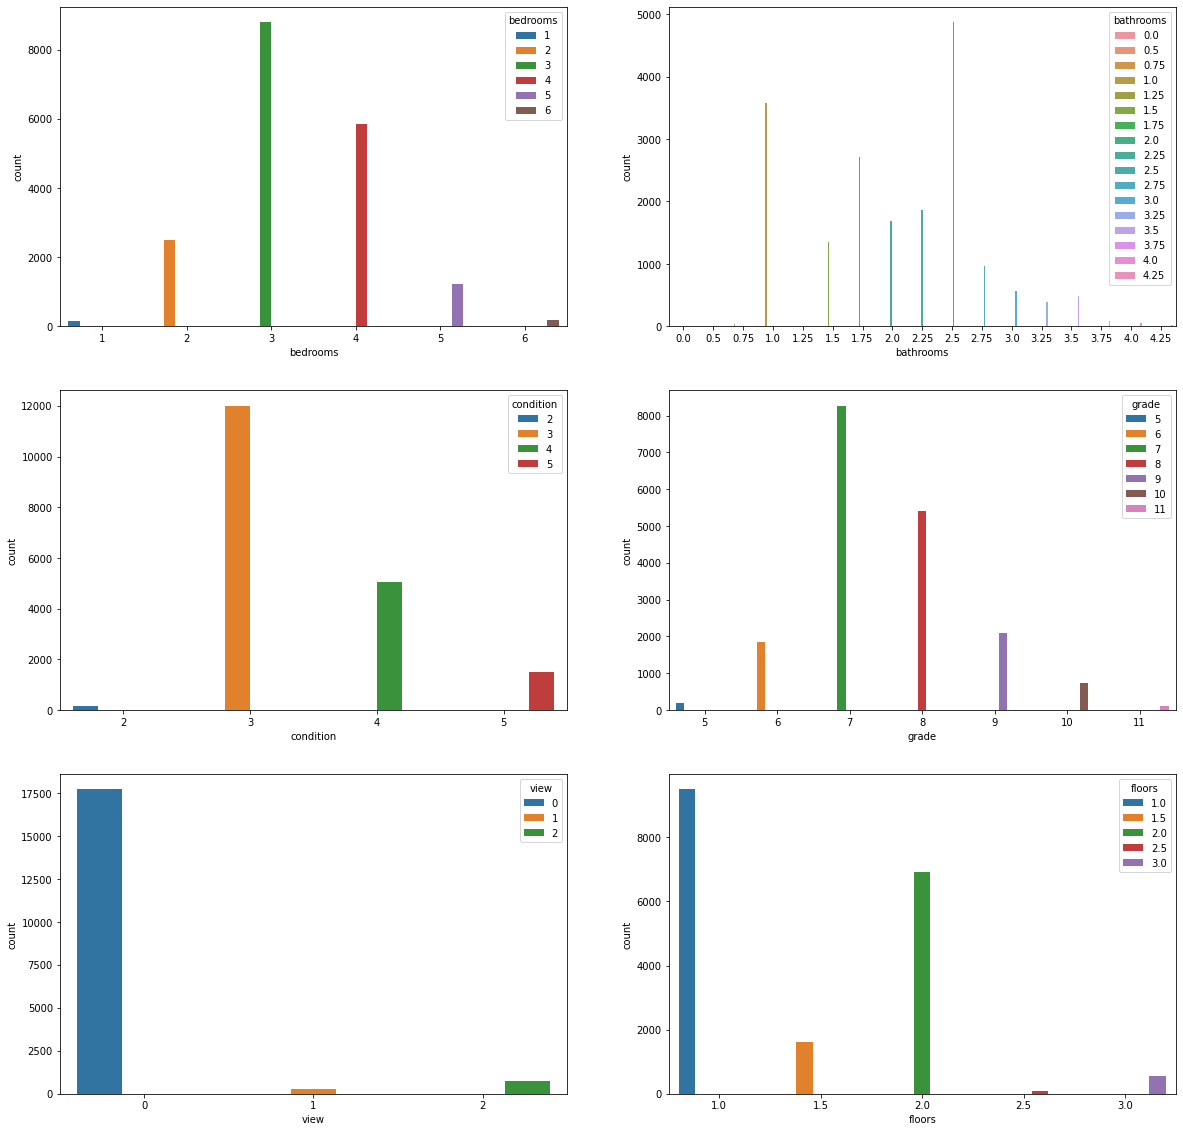

In [ ]:
# Plotting Distribution Plots and Count Plots for the various attributes in our dataser
fig,axes=plt.subplots(3,2, figsize=(20,20))
sns.countplot('bedrooms', data=housing_df, hue='bedrooms', ax=axes[0,0])
sns.countplot('bathrooms', data=housing_df, hue='bathrooms', ax=axes[0,1])
sns.countplot('condition', data=housing_df, hue='condition', ax=axes[1,0])
sns.countplot('grade', data=housing_df, hue='grade', ax=axes[1,1]);
sns.countplot('view', data=housing_df, hue='view', ax=axes[2,0]);
sns.countplot('floors', data=housing_df, hue='floors', ax=axes[2,1]);

From the countplots, we can be able to gather some important information such as:
- Most houses in our datasets have 3 bedrooms, followed by 4 bedrooms.
- Most houses have 2.5 bathrooms, followed by 1.0 bathrooms.
- Most houses lie in consition 3 and are of grade 7.
- Most houses have 2.0 floors
- Most houses do not have a view.

###2. Bivariate Analysis

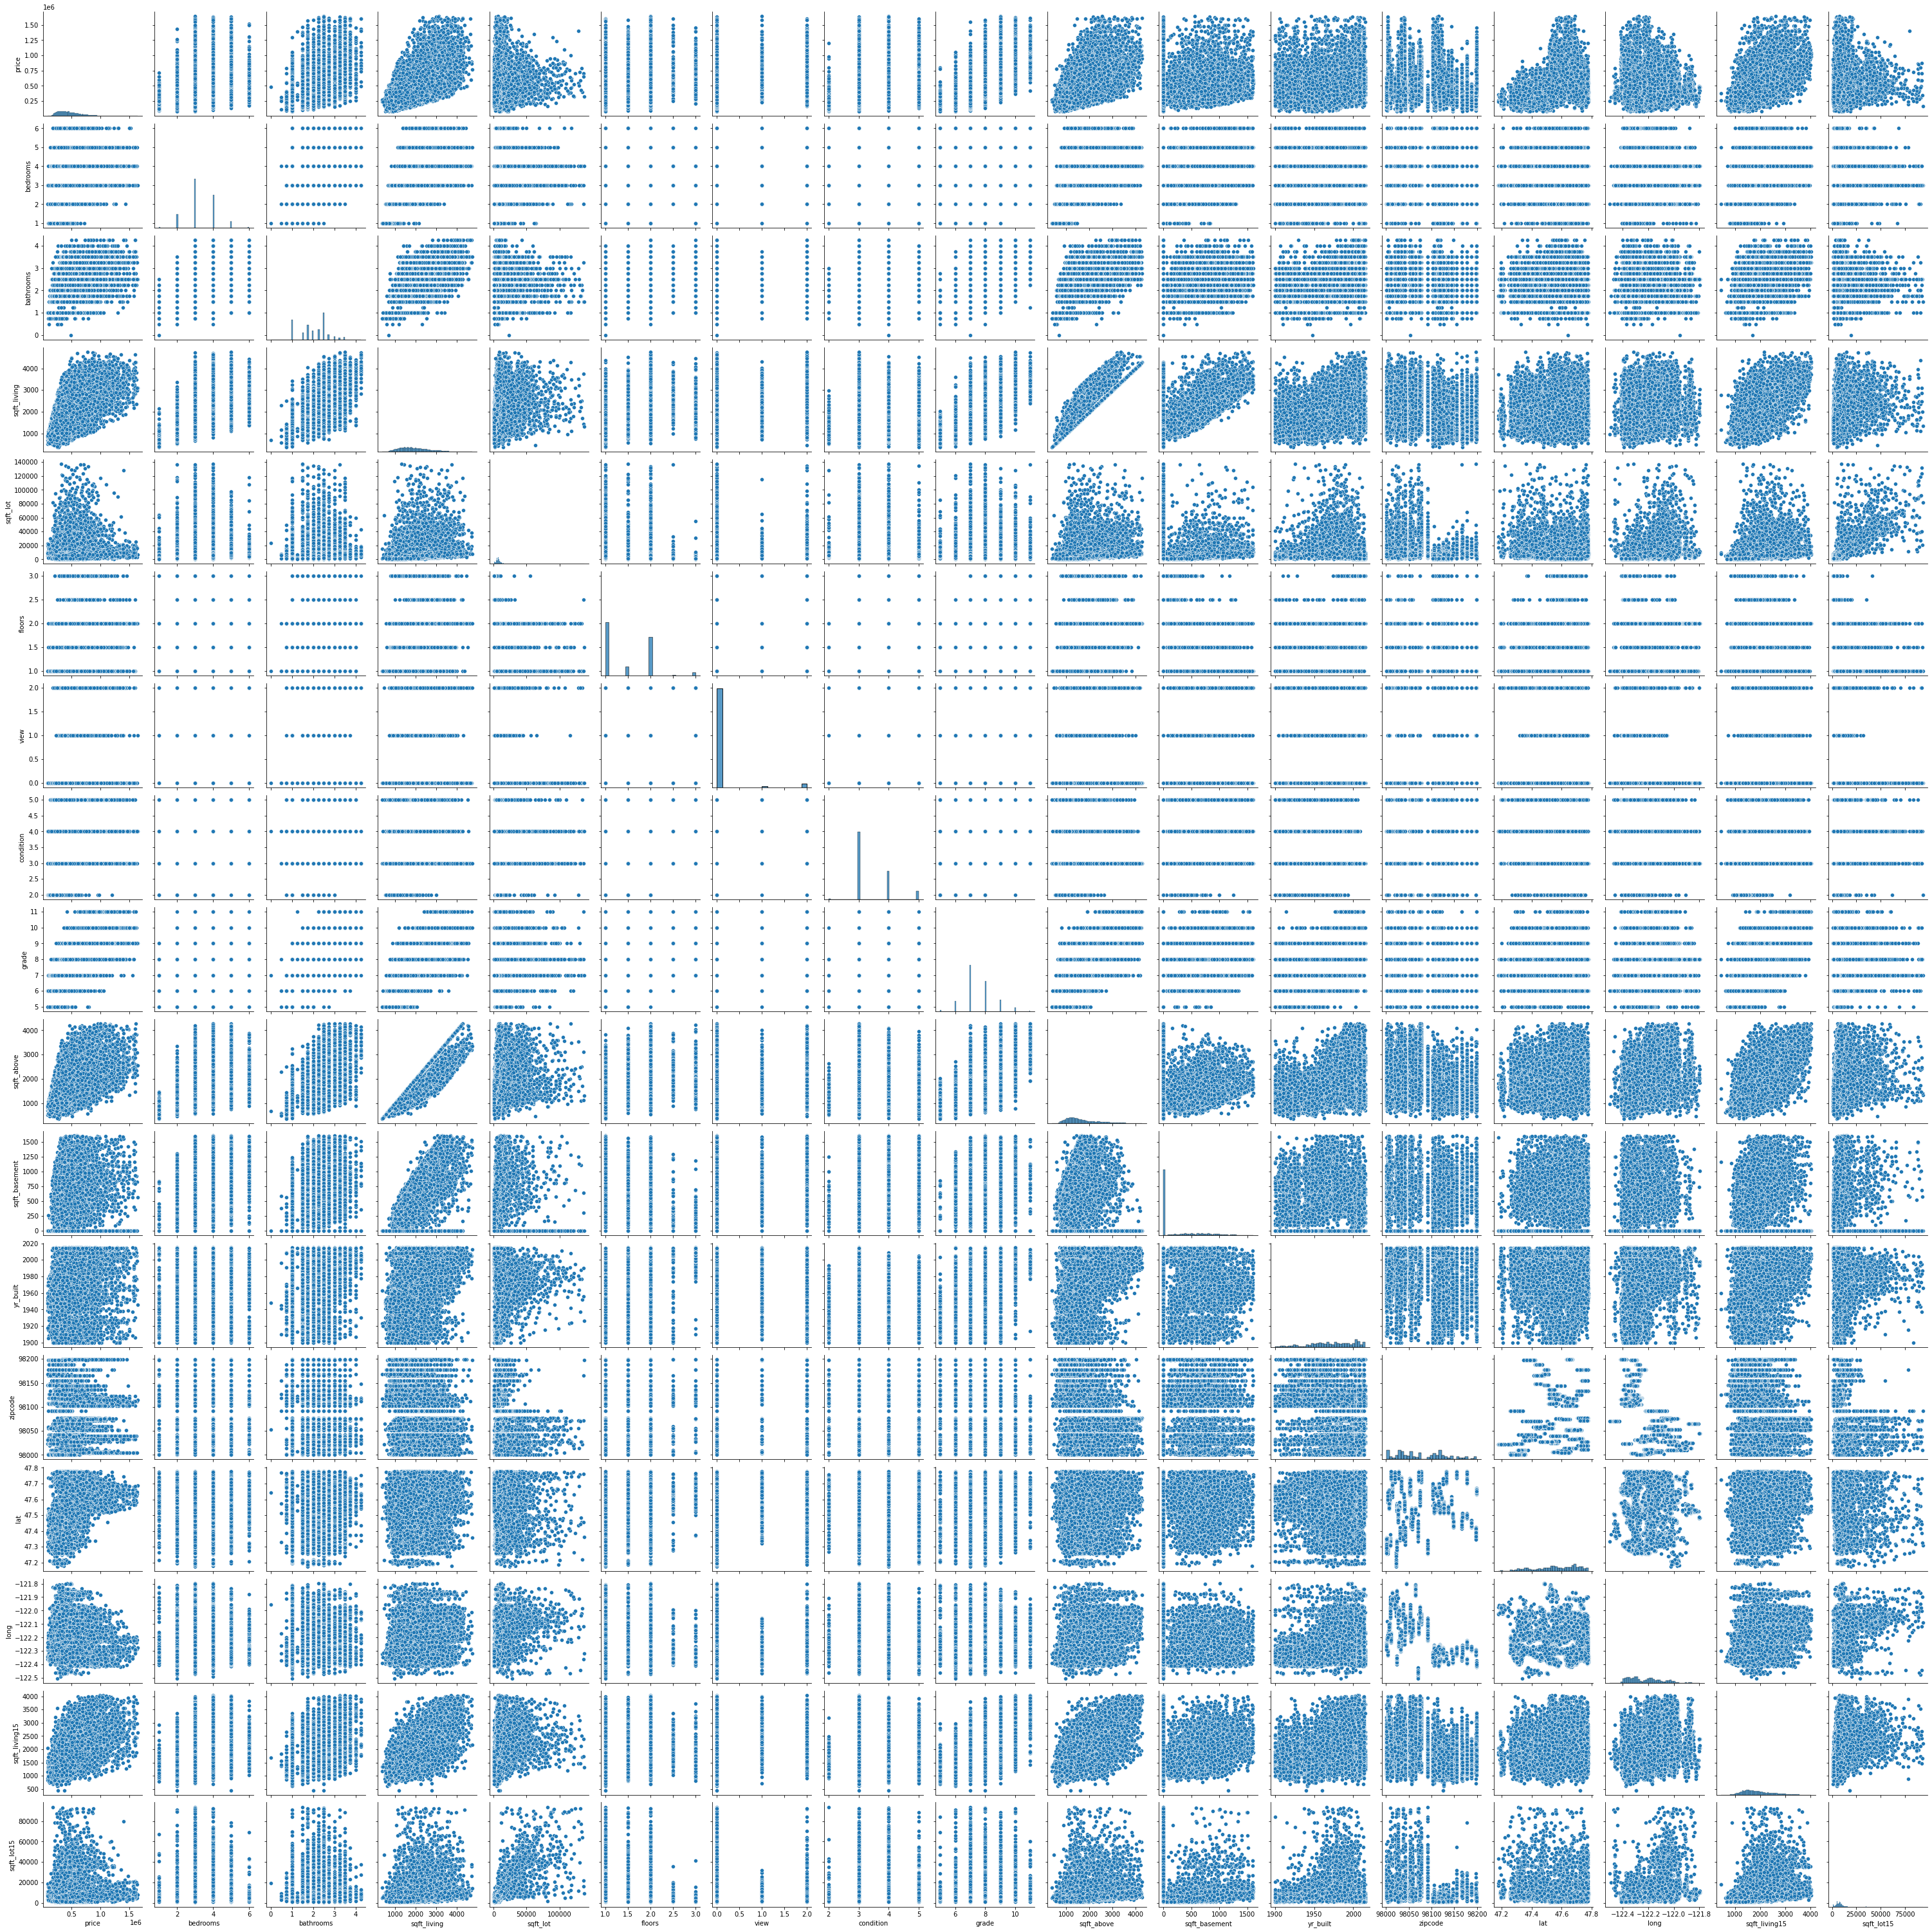

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(housing_df)
plt.show()

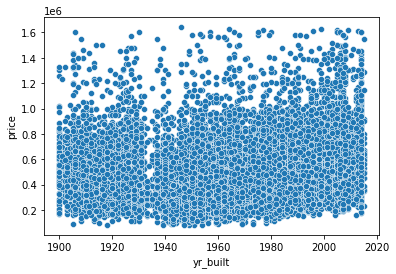

In [ ]:
# Scatterplot showing if year built is correlated to the price
sns.scatterplot(x='yr_built',y='price',data=housing_df);

From this scatter plot, it is so hard to interpret the relationship between yr_built and price. There is no correlation

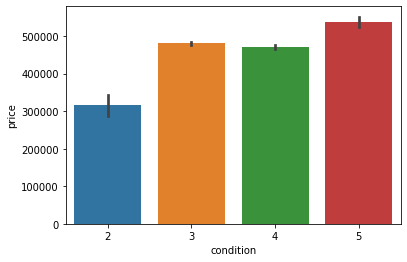

In [ ]:
# Barplot showing if condition is correlated to the price
sns.barplot(x='condition', y='price',data=housing_df);

From the bar plot, we can see that the higher the condition of the house, the higher the price of the house.

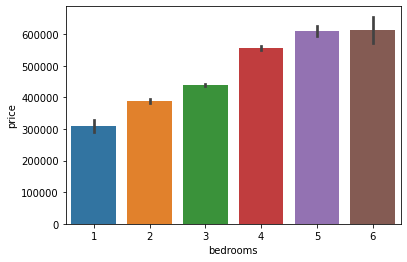

In [ ]:
# Scatterplot showing if the number of bedrooms is correlated to the price
sns.barplot(x='bedrooms', y='price',data=housing_df);

From the bar plot, we can see that the more the number of bedroomss, the higher the price of the house.

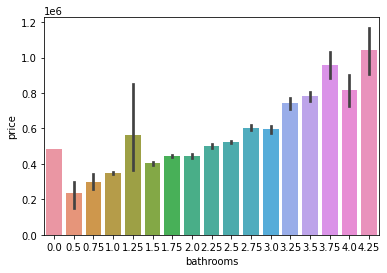

In [ ]:
# Scatterplot showing if the number of bathrooms is correlated to the price
sns.barplot(x='bathrooms', y='price',data=housing_df);

From the bar plot, we can see that the more the number of bathrooms, the hiher the price of the house.

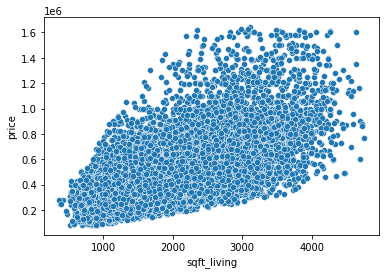

In [ ]:
# Scatterplot showing if the sqft_living is correlated to the price
sns.scatterplot(x='sqft_living', y='price',data=housing_df);

From the scatter plot, we see that there is a positive correlation between sqft_living and price. The increase in one leads to the increase of the other.

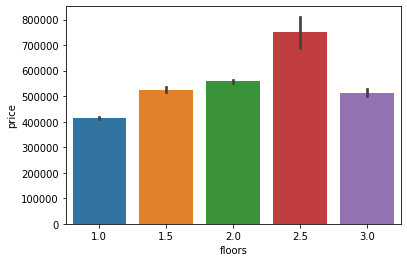

In [ ]:
# Scatterplot showing if the number of floors is correlated to the price
sns.barplot(x='floors', y='price',data=housing_df);

From the bar plot, we can see that more floors attract a relatively high price for the house.

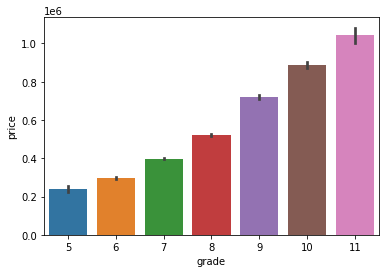

In [ ]:
# Scatterplot showing if grade is correlated to the price
sns.barplot(x='grade', y='price',data=housing_df);

From the bar plot, we see that the higher the grade, the higher the price of the house.

From our Bivariate Analysis, we can conclude on the following:
- Price of the house if mainly influenced by condition, number of bedrooms, sqft_living, number of bathrooms, grade, and number of floors. 

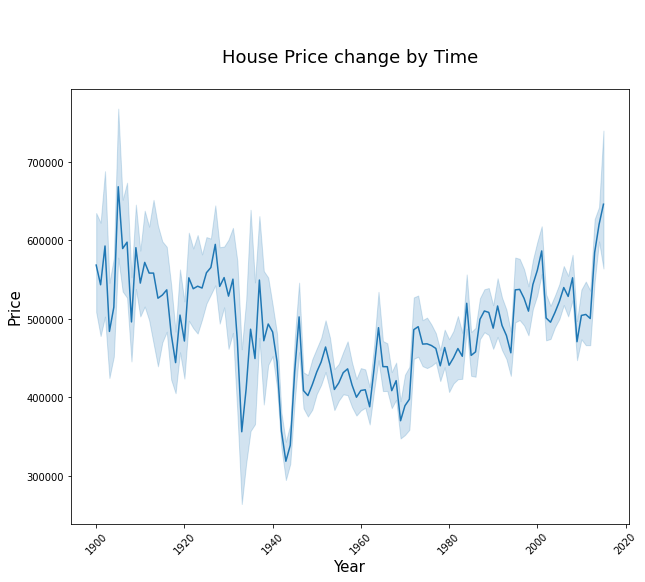

In [ ]:
# Plotting a graph of house price changes over time
plt.figure(figsize=(10,8))
sns.lineplot(x='yr_built',y='price',data=housing_df)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title('\n\nHouse Price change by Time\n',fontsize=18)
plt.xticks(rotation=45)
plt.show()

From the graph, we see that there was a spike in the price of houses initially, then with time the price started deeping, and has has started rising. This could be attributed to many factors, for instance the economy.

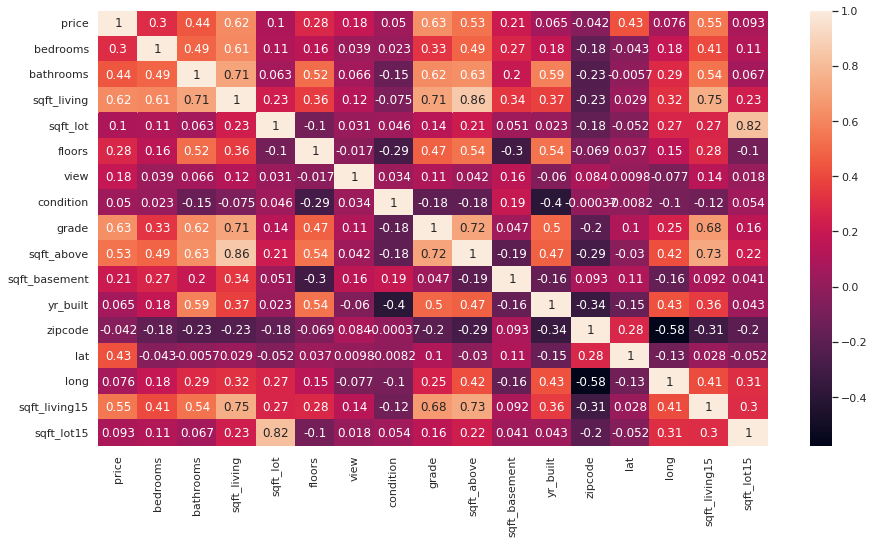

In [ ]:
_# Plotting a heatmap to show the correlation between the different numerical  variables
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(housing_df.corr(),annot=True);

In the heatmap, the values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is(for instance, sqft_living and bedrooms). A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases (for instance, yr_built and condition).

From the table, we can see that the independent variables are not correlated. There is no value above 1.000

###3. Multivariate (LDA)

In [ ]:
# Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels.
X = housing_df.drop('price', 1)
y = housing_df['price']

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
# import the Logistic Regression model from sklearn using the 2 variances with the help of LDA
from  sklearn.linear_model import LogisticRegression
LG=LogisticRegression(random_state=0)

In [ ]:
# Fitting the Logistic Regression model
LG.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
# Predicting the Logistic regression model
y_pred=LG.predict(X_test)

In [ ]:
# Evaluating the Performance
# As always, the last step is to evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy0.012028869286287089


This model is not viable because it does not give optimal performance. It has not bee able to make any correct predictions and it's accuracy level is 1.20%, which is quite low.

##7. Implementing the Solution

###Regression Analysis

In [ ]:
# Let's check for multi-collinearity using the Pearson's correlation
corr = housing_df.corr()
corr

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.302788   0.442812     0.622060  0.100828  0.276191   
bedrooms       0.302788  1.000000   0.488893     0.608972  0.112746  0.160498   
bathrooms      0.442812  0.488893   1.000000     0.711353  0.063347  0.519398   
sqft_living    0.622060  0.608972   0.711353     1.000000  0.231006  0.356827   
sqft_lot       0.100828  0.112746   0.063347     0.231006  1.000000 -0.101775   
floors         0.276191  0.160498   0.519398     0.356827 -0.101775  1.000000   
view           0.182537  0.038693   0.066392     0.122598  0.031286 -0.016590   
condition      0.049937  0.023239  -0.145639    -0.074796  0.045819 -0.288884   
grade          0.634593  0.334244   0.619059     0.711335  0.142563  0.473701   
sqft_above     0.533158  0.485813   0.632685     0.857316  0.212953  0.538086   
sqft_basement  0.210831  0.272432   0.199064     0.338502  0.050948 -0.303592   
yr_built       0.065090  0.176807   0.585998     0.371119  0.023003  0.538005   
zipcode       -0.042134 -0.179315  -0.232417    -0.228547 -0.180361 -0.068860   
lat            0.427896 -0.042529  -0.005697     0.029256 -0.052450  0.036616   
long           0.075791  0.184035   0.288868     0.317485  0.272122  0.153655   
sqft_living15  0.550734  0.407048   0.537759     0.750163  0.269948  0.280000   
sqft_lot15     0.092859  0.114425   0.066941     0.234736  0.817127 -0.104964   

                   view  condition     grade  sqft_above  sqft_basement  \
price          0.182537   0.049937  0.634593    0.533158       0.210831   
bedrooms       0.038693   0.023239  0.334244    0.485813       0.272432   
bathrooms      0.066392  -0.145639  0.619059    0.632685       0.199064   
sqft_living    0.122598  -0.074796  0.711335    0.857316       0.338502   
sqft_lot       0.031286   0.045819  0.142563    0.212953       0.050948   
floors        -0.016590  -0.288884  0.473701    0.538086      -0.303592   
view           1.000000   0.033765  0.106591    0.041733       0.157334   
condition      0.033765   1.000000 -0.182800   -0.184552       0.194807   
grade          0.106591  -0.182800  1.000000    0.716119       0.046523   
sqft_above     0.041733  -0.184552  0.716119    1.000000      -0.194197   
sqft_basement  0.157334   0.194807  0.046523   -0.194197       1.000000   
yr_built      -0.060470  -0.399135  0.499256    0.474075      -0.159355   
zipcode        0.084000  -0.000366 -0.200203   -0.288898       0.092556   
lat            0.009823  -0.008241  0.102821   -0.029613       0.109879   
long          -0.077292  -0.100942  0.253668    0.420464      -0.163565   
sqft_living15  0.142528  -0.119187  0.676104    0.731728       0.091982   
sqft_lot15     0.018087   0.053833  0.157664    0.222090       0.041353   

               yr_built   zipcode       lat      long  sqft_living15  \
price          0.065090 -0.042134  0.427896  0.075791       0.550734   
bedrooms       0.176807 -0.179315 -0.042529  0.184035       0.407048   
bathrooms      0.585998 -0.232417 -0.005697  0.288868       0.537759   
sqft_living    0.371119 -0.228547  0.029256  0.317485       0.750163   
sqft_lot       0.023003 -0.180361 -0.052450  0.272122       0.269948   
floors         0.538005 -0.068860  0.036616  0.153655       0.280000   
view          -0.060470  0.084000  0.009823 -0.077292       0.142528   
condition     -0.399135 -0.000366 -0.008241 -0.100942      -0.119187   
grade          0.499256 -0.200203  0.102821  0.253668       0.676104   
sqft_above     0.474075 -0.288898 -0.029613  0.420464       0.731728   
sqft_basement -0.159355  0.092556  0.109879 -0.163565       0.091982   
yr_built       1.000000 -0.339495 -0.154612  0.427840       0.356722   
zipcode       -0.339495  1.000000  0.279106 -0.575570      -0.305975   
lat           -0.154612  0.279106  1.000000 -0.125661       0.028173   
long           0.427840 -0.575570 -0.125661  1.000000       0.414929   
sqft_living15  0.356722 -0.305975  0.028173  0.414929   

In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('price ~ bedrooms+bathrooms+sqft_living+sqft_lot+floors+view+condition+grade+sqft_above+sqft_basement+yr_built+zipcode+lat+long+sqft_living15+sqft_lot15', data=housing_df, return_type='dataframe')
#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

VIF       variable
0   4.746198e+06      Intercept
1   1.715587e+00       bedrooms
2   3.121793e+00      bathrooms
3            inf    sqft_living
4   3.049832e+00       sqft_lot
5   2.204780e+00         floors
6   1.076592e+00           view
7   1.273348e+00      condition
8   2.914743e+00          grade
9            inf     sqft_above
10           inf  sqft_basement
11  2.547137e+00       yr_built
12  1.686395e+00        zipcode
13  1.188277e+00            lat
14  1.970921e+00           long
15  2.979129e+00  sqft_living15
16  3.151786e+00     sqft_lot15

From the table above, we see that sqft_living, sqft_above and sqft_basement have a high VIF score. This means that they are hightly correlated to price.

In [ ]:
# using the correlation coefficients to compute the VIF score for each variable we have:
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

price  bedrooms  bathrooms   sqft_living  sqft_lot  \
price          3.117670  0.164279  -0.257275 -9.352669e-01 -0.042295   
bedrooms       0.164279  1.724243  -0.392196 -4.787764e-01  0.036899   
bathrooms     -0.257275 -0.392196   3.143024  6.751952e-01  0.037225   
sqft_living   -0.922216 -0.476146   0.674734 -9.199647e+13  0.438560   
sqft_lot      -0.042295  0.036899   0.037225  4.427125e-01  3.050406   
floors        -0.220724  0.077439  -0.701604  2.722036e-01  0.094457   
view          -0.208925  0.047886  -0.017727  1.582305e-01 -0.035059   
condition     -0.252830 -0.052287  -0.157545 -1.538870e-01  0.039285   
grade         -1.179899  0.226712  -0.110605  7.890835e-01  0.032093   
sqft_above    -0.068147 -0.677287  -1.569981  8.824548e+13 -0.676121   
sqft_basement  0.004725 -0.365016  -1.364292  4.827795e+13 -0.327414   
yr_built       0.851569  0.183952  -1.086278 -1.484586e+00  0.089650   
zipcode        0.236709  0.106898   0.035322 -3.318346e-01  0.037856   
lat           -1.072035  0.012262   0.056895  2.627473e-01  0.046021   
long           0.166317  0.034302  -0.021664  2.187926e-01 -0.061381   
sqft_living15 -0.352751  0.052742   0.003067 -2.014291e+00  0.049585   
sqft_lot15     0.163671  0.022491   0.089763 -2.114445e-01 -2.421256   

                 floors      view  condition     grade    sqft_above  \
price         -0.220724 -0.208925  -0.252830 -1.179899 -4.992133e-02   
bedrooms       0.077439  0.047886  -0.052287  0.226712 -6.732110e-01   
bathrooms     -0.701604 -0.017727  -0.157545 -0.110605 -1.579370e+00   
sqft_living    0.275442  0.155457  -0.152763  0.748637  8.824548e+13   
sqft_lot       0.094457 -0.035059   0.039285  0.032093 -6.803513e-01   
floors         2.220407  0.001375   0.108586 -0.155553 -8.310212e-01   
view           0.001375  1.090593   0.011271 -0.009665 -3.534960e-02   
condition      0.108586  0.011271   1.293852  0.060693  2.531187e-01   
grade         -0.155553 -0.009665   0.060693  3.361282 -1.713284e+00   
sqft_above    -0.833327 -0.032933   0.251645 -1.674225 -8.464743e+13   
sqft_basement  0.492212 -0.167400   0.011577 -0.623376 -4.630951e+13   
yr_built      -0.560632  0.054745   0.528903 -0.944445  1.594268e+00   
zipcode       -0.184550 -0.109943   0.142867  0.006691  1.158422e-01   
lat           -0.066189  0.145356   0.144789  0.080445  2.539793e-01   
long           0.173231  0.050921  -0.048927  0.341646 -6.296566e-01   
sqft_living15  0.318815 -0.197835   0.145270 -0.659117  3.692545e-01   
sqft_lot15     0.169302  0.029913  -0.096372 -0.124492  1.208847e-01   

               sqft_basement  yr_built   zipcode       lat      long  \
price           1.073317e-02  0.851569  0.236709 -1.072035  0.166317   
bedrooms       -3.612748e-01  0.183952  0.106898  0.012262  0.034302   
bathrooms      -1.365069e+00 -1.086278  0.035322  0.056895 -0.021664   
sqft_living     4.827795e+13 -1.465537 -0.333283  0.258600  0.200061   
sqft_lot       -3.293913e-01  0.089650  0.037856  0.046021 -0.061381   
floors          4.948932e-01 -0.560632 -0.184550 -0.066189  0.173231   
view           -1.690241e-01  0.054745 -0.109943  0.145356  0.050921   
condition       1.235228e-02  0.528903  0.142867  0.144789 -0.048927   
grade          -6.431571e-01 -0.944445  0.006691  0.080445  0.341646   
sqft_above     -4.630951e+13  1.575996  0.117231  0.257958 -0.611689   
sqft_basement  -2.533533e+13  0.869381  0.030826 -0.063451  0.051100   
yr_built        8.793777e-01  2.779737  0.288435  0.040636 -0.517500   
zipcode         3.006566e-02  0.288435  1.704367 -0.414200  0.788423   
lat            -6.562785e-02  0.040636 -0.414200  1.556904 -0.197464   
long            4.127018e-02 -0.517500  0.788423 -0.197464  1.979793   
sqft_living15   5.982287e-01  0.042425  0.150237  0.035264 -0.395858   
sqft_lot15      9.364878e-02  0.002968 -0.029937 -0.041005 -0.238646   

               sqft_living15  sqft_lot15  
price              -0.352751    0.163671  
bedrooms            0.052742    0.022491 

###1.Multiple Linear Regression

In [ ]:
#Get the columns that will be used in building a model from the dataset 
X = housing_df.drop('price', 1)
y = housing_df['price']
print(X)
print(y)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  condition  \
0             3       1.00         1180      5650     1.0     0          3   
1             2       1.00          770     10000     1.0     0          3   
2             4       3.00         1960      5000     1.0     0          5   
3             3       2.00         1680      8080     1.0     0          3   
4             3       2.25         1715      6819     2.0     0          3   
...         ...        ...          ...       ...     ...   ...        ...   
18697         3       2.50         1530      1131     3.0     0          3   
18698         4       2.50         2310      5813     2.0     0          3   
18699         2       0.75         1020      1350     2.0     0          3   
18700         3       2.50         1600      2388     2.0     0          3   
18701         2       0.75         1020      1076     2.0     0          3   

       grade  sqft_above  sqft_basement  yr_built  zipcode     

In [ ]:
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Assessing the accuracy of the model
y_pred = regressor.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

Actual     Predicted
count  3.741000e+03  3.741000e+03
mean   4.793656e+05  4.768816e+05
std    2.362444e+05  1.898065e+05
min    8.250000e+04 -6.464416e+04
25%    3.110000e+05  3.388476e+05
50%    4.300000e+05  4.649810e+05
75%    5.900000e+05  5.913559e+05
max    1.610000e+06  1.160167e+06

In [ ]:
# Calculating the MAE,MSE, and RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 95903.09125370483
Mean Squared Error: 18437137604.757626
Root Mean Squared Error: 135783.42168599827


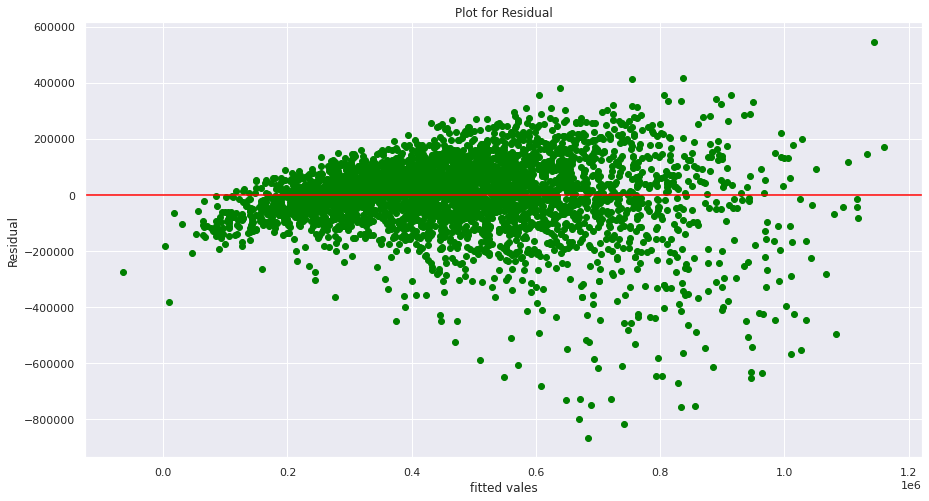

In [ ]:
# Residual plots and heteroskedasticity testing
residual =y_pred - y_test
# Plotting the prediction errors
plt.scatter(y_pred, residual, color ='green')
plt.title('Plot for Residual')
plt.ylabel('Residual')
plt.xlabel('fitted vales')
plt.axhline(y= residual.mean(), color ='red')
plt.show()

This does not look too bad: our residuals are centered around a mean that is very close to 0, and there are no glaringly obvious patterns. Let's further perform a heteroskedasticity test.

For this we will use bartlett's test. The test establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residual)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


This, therefore, means that the distribution, or “spread,” of scores around the mean of the variables are considered equal.

###2. Quantile Regression

In [ ]:
## preparing the data
columns = ['bedrooms', 'bathrooms', 'sqft_living',
       'floors','view', 'condition','grade', 'sqft_above',
       'sqft_basement','sqft_living15',]


for i,colval in enumerate(columns):
  x = np.array(housing_df[colval].values.reshape(-1,1))
  Y = np.array(housing_df['price'])

 # We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=10)
# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('Y ~ x', housing_df)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      Y   Pseudo R-squared:               0.1723
Model:                       QuantReg   Bandwidth:                   3.132e+04
Method:                 Least Squares   Sparsity:                    4.633e+05
Date:                Thu, 21 Apr 2022   No. Observations:                18702
Time:                        04:54:23   Df Residuals:                    18700
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.211e+04   5664.028      9.200      0.000     4.1e+04    6.32e+04
x            210.7438      2.829     74.485      0.000     205.198     216.290

The condition number is large, 6.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


In [ ]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


    qt      intercept      x_coef  cf_lower_bound  cf_upper_bound
0  0.1   30634.615381  127.884615      125.071566      130.697665
1  0.2   24956.756763  152.432432      149.220590      155.644275
2  0.3   19150.618011  179.409939      174.971589      183.848290
3  0.4   28157.894735  199.248120      194.156681      204.339559
4  0.5   52107.438016  210.743802      205.198010      216.289594
5  0.6   82114.285713  219.285714      214.052432      224.518997
6  0.7  118656.716420  223.880597      218.279687      229.481507
7  0.8  157777.777777  236.111111      228.902266      243.319956
8  0.9  184272.727302  280.681818      269.836951      291.526685


Mean squared error: 37310767756.63
Variance score: 0.30


Text(0.5, 1.0, 'predictors of price')

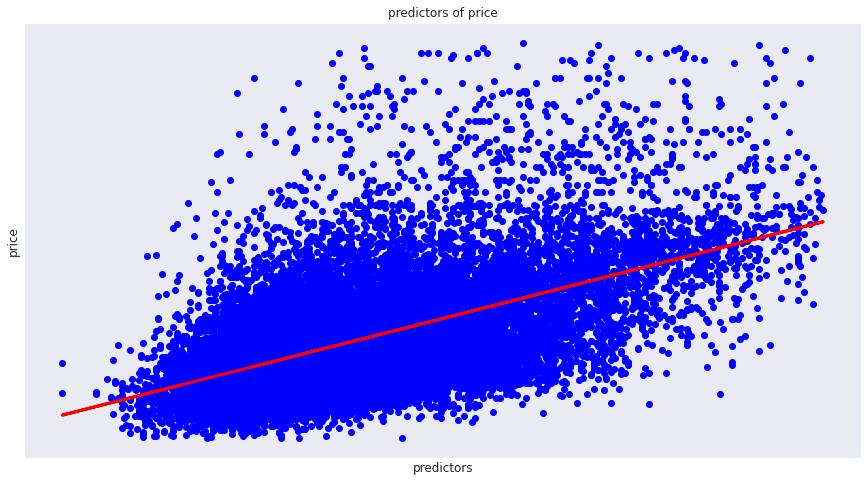

In [ ]:
## Let's now trying to fit a linear regression

mod = LinearRegression(fit_intercept = True, normalize = False)
mod.fit(x,Y)

Y_predict = mod.predict(x)


print("Mean squared error: {0:.2f}"
    .format(np.mean((Y_predict - Y) ** 2)))
print('Variance score: {0:.2f}'.format(mod.score(x, Y)))

# With a low variance score of 0.30, it means that our linear regression 
# did not do a good job. 
plt.figure(2)
plt.scatter(x, Y,  color='blue')
plt.plot(x, Y_predict, color='red',
         linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("predictors")
plt.ylabel("price")
plt.title("predictors of price")

<Figure size 1080x576 with 0 Axes>

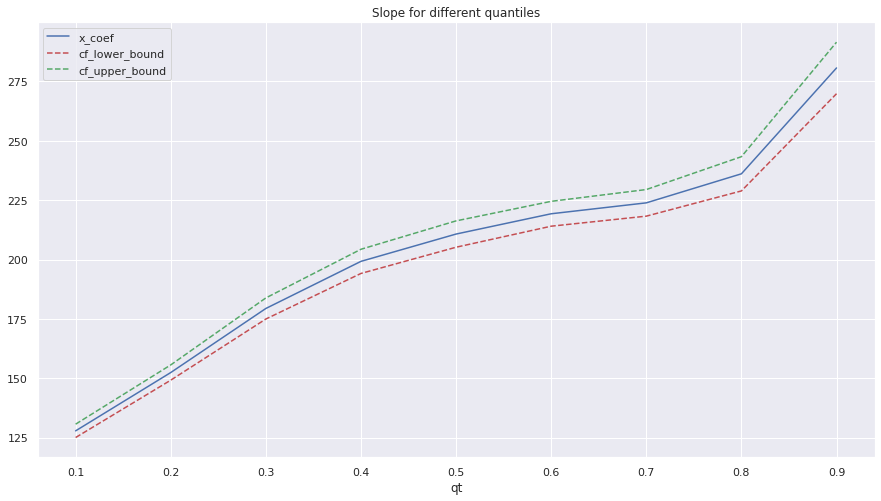

In [ ]:
## Plot the changes in the quantile coeffiecients
# 
plt.figure(6)
params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
            title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])

plt.show()

The Mean squared error of our quantile regression is 37310767756.63,which is higher than that of our linear regression 18437137604.757626. Hence our linear model performed better than our quantile model

###3.Ridge Regression

In [ ]:
# Setting up our X and y datasets
#
columns = ['bedrooms', 'bathrooms', 'sqft_living',
       'floors','view', 'condition','grade', 'sqft_above',
       'sqft_basement','sqft_living15',]


for i,colval in enumerate(columns):
  x = np.array(housing_df[colval].values.reshape(-1,1))
  Y = np.array(housing_df['price'])

In [ ]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

17177622865.707552


In [ ]:
# In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. 
# L2 is the name of the hyperparameter that is used in ridge regression. 
# Determining the value of a hyperparameter requires the use of a grid. 
# In the code below, we first create our ridge model and indicate normalization in order to get better estimates. 
# Next we setup the grid that we will use. 
# The search object has several arguments within it. Alpha is hyperparameter we are trying to set. 
# The log space is the range of values we want to test. 
# We want the log of -5 to 2, but we only get 8 values from within that range evenly spread out. 
# Are metric is the mean squared error. Refit set true means to adjust the parameters while modeling 
# and cv is the number of folds to develop for the cross-validation. 
#
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

# The best_params_ tells us what to set alpha too which in this case is 0.01. 
# The best_score_ tells us what the best possible mean squared error is. 
# In this case, the value of 17369235922.412106 is worse than what the baseline model was. 

17369235922.412106

In [ ]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

17180769324.633507


In [ ]:
# The 17180769324.633507 is lower than the 17369235922.412106. This is because the last results are not cross-validated. 
# In addition, these results indicate that there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,housing_df.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 63.92320668382945,
 'bedrooms': 27773.209622517585,
 'condition': 85436.35626664048,
 'floors': 38764.39658507523,
 'grade': 35.98758517393162,
 'lat': -95988.39868273528,
 'long': 43.73552791962902,
 'price': -14378.023077884833,
 'sqft_above': 27.935621453635576,
 'sqft_basement': -2181.884772167134,
 'sqft_living': 0.2761501538043376,
 'sqft_living15': -1.3604289694867475,
 'sqft_lot': 30326.887922468413,
 'view': 28968.1892667477,
 'yr_built': -329.607229940368,
 'zipcode': 567586.6843579451}

The best fit for the ridge model is 17369235922.412106, which is lower than that of quantile model and multiple linear regression, hence making it a better model among the three. 

###4. Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# Setting up our X and y datasets
#
columns = ['bedrooms', 'bathrooms', 'sqft_living',
       'floors','view', 'condition','grade', 'sqft_above',
       'sqft_basement','sqft_living15',]


for i,colval in enumerate(columns):
  x = np.array(housing_df[colval].values.reshape(-1,1))
  Y = np.array(housing_df['price'])
# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
# Creating lasso object
# 
from sklearn import linear_model
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6792476593094965
lasso MSE: 17177622904.808208
lasso coef: [-12193.13333399  19091.06293105 133172.52649388   3135.26360203
  16383.6340675   15507.50787358  18765.996531    87583.23680885
 -57015.29923265 -34309.29327392 -63207.7847589  -17567.80639938
  79573.39420786 -12342.72900359  26178.44893428 -12144.8205489 ]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 9.0}
lasso score: 0.6782100680202617
linear score: 0.6782127679721701
lasso MSE: 17780871202.74156
linear MSE: 17780722013.8069
lasso best estimator coef: [-11882.91504938  18262.49835075 114508.05799507   3374.09107839
  16383.33870252  15548.14780817  17616.89884987  86237.04779213
 -39168.51686858 -24367.23752144 -62061.15796747 -16960.76757738
  79818.40090654 -12910.2763485   26787.71882122 -11721.0886999 ]
linear coef: [-11891.47233822  18314.64964854  39381.85196513   3412.67058621
  16385.17564256  15553.17303691  17626.6239784   86219.6435506
  32840.13837961  15017.15573704 -62080.86346529 -16983.56393558
  79830.71131097 -12933.64709953  26838.01874026 -11759.12287686]


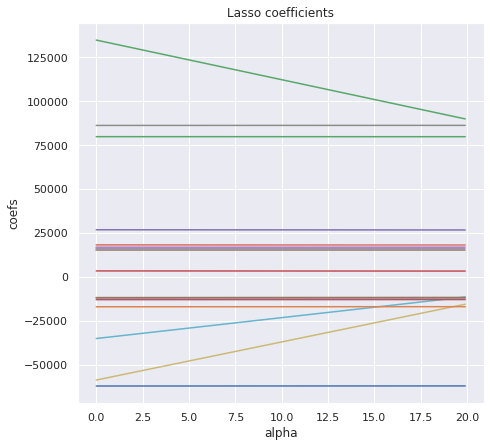

In [ ]:
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# As we can see, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 
# Therefore Lasso can also be used to determine which features are important 
# to us and keeps the features that may influence the target variable

The MSE for the best fit for this model is 17780871202.74156. This is a better performance model as compared to the previous four models. This is a better performaing model.

###5. Elastic Net Regression

In [ ]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
from sklearn.linear_model import ElasticNet
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

17387123549.314587

In [ ]:
# The best hyperparameters was an alpha set to 0.001 and a l1_ratio of 0.8. 
# With these settings we got an MSE of 1.08. This is above our baseline model of MSE 1.05  for the baseline model. 
# Which means that elastic net is doing worse than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

33540800902.466507


In [ ]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,housing_df.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficients are mostly the same. 
# Notice that occupation was completely removed from the model in the elastic net version. 
# This means that this values was no good to the algorithm. Traditional regression cannot do this.

{'bathrooms': 16372.809119150532,
 'bedrooms': 10158.701636386057,
 'condition': 18278.22803623632,
 'floors': 5844.0898811080815,
 'grade': 13435.182638978758,
 'lat': -743.4777099892063,
 'long': 14536.514838301018,
 'price': 6093.389467940977,
 'sqft_above': 6641.654404931952,
 'sqft_basement': -2867.341288741959,
 'sqft_living': 1613.3160809158678,
 'sqft_living15': 1086.444756317993,
 'sqft_lot': 6412.10084440476,
 'view': 3668.421800771401,
 'yr_built': 560.4104063310622,
 'zipcode': 16813.552437514303}

The MSE for the best fit for this model is 17387123549.314587, which is larger than that of Lasso Regression. 

The best model for our case is the Lasso Regression. It is the model that will give better results when compared to the other four models.

##8. Challenging the Solution

As much as the Lasso is the better performing model out of the five, it still does not give better performance. I, therefore, suggest other models to be utilized to achieve better results.